<a href="https://colab.research.google.com/github/desireesosa/EDPII/blob/main/SimetricoVariacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÉTODO SIMETRICO VARIACIONAL**

El método variacional simétrico es una variante del método de Galerkin dentro de los métodos de residuos ponderados. Su característica principal es que la función de prueba se elige en el mismo espacio funcional que la solución aproximada, lo que conduce a una formulación integral simétrica y, en muchos casos, a matrices algebraicas simétricas.



***Aproximación de la solución:***

La solución aproximada se busca como una combinación lineal de funciones base:
$$
u_N(x) = \sum_{i=1}^{N} \alpha_i \, \beta_i(x)
$$


***Función de prueba:***

En el método variacional simétrico, la función de prueba se define como:
$$
v(x) = \sum_{i=1}^{N} \lambda_i \, \beta_i(x)
$$
Lo que significa que tanto la solución aproximada como la función de prueba pertenecen al mismo espacio funcional generado por las funciones base.


***Formulación variacional:***

Sea 𝐸 el residuo asociado al problema diferencial. El método impone la condición de ortogonalidad
$$
\int_a^b E \, v \, dx = 0
\quad \forall v \in \text{span}\{\beta_1,\dots,\beta_N\}
$$


***Integración por partes y forma variacional simetrica***

Para reducir el orden de las derivadas, se aplica integración por partes a los términos que contienen derivadas de orden superior. Tras la integración por partes, la formulación adopta la forma general:
$$
\int_a^b \left(
- u_N'(x)\, v'(x)
+ u_N(x)\, v(x)
+ f(x)\, v(x)
\right) dx = 0
$$


***Sistema algebraico resultante:***

Al sustituir las expresiones de 𝑢𝑁 y 𝑣 en la formulación variacional y agrupar términos, se obtiene un sistema lineal de ecuaciones:

$$
\sum_{j=1}^{N} K_{ij}\,\alpha_j = F_i,
\quad i = 1,2,\dots,N
$$

donde los coeficientes se definen como

1. *Matriz de rigidez*
$$
K_{ij} =
\int_a^b
\left(
- \beta_i'(x)\,\beta_j'(x)
+ \beta_i(x)\,\beta_j(x)
\right) dx
$$

2. *Vector de carga*
$$
F_i =
- \int_a^b f(x)\,\beta_i(x)\, dx
$$

El método variacional simétrico reduce el orden de derivación requerido, permite el uso de funciones base menos restrictivas y produce una estructura algebraica compatible con el método de los elementos finitos.


In [ ]:
#codigo metodo variacional

**Problema 5.5.13**
$$
\frac{d^2 u}{dx^2} + u = x, \quad 0 < x < 1
$$

sujeto a las condiciones de frontera:

$$
u(0) = 0, \quad u(1) = 0
$$



In [7]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')

def beta(i):
    return x**i

def beta_prime(i):
    return sp.diff(beta(i), x)

In [8]:
def stiffness_matrix(N):
    K = sp.zeros(N, N)
    for i in range(1, N+1):
        for j in range(1, N+1):
            integrand = -beta_prime(i)*beta_prime(j) + beta(i)*beta(j)
            K[i-1, j-1] = sp.integrate(integrand, (x, 0, 1))
    return K

def load_vector(N):
    F = sp.zeros(N, 1)
    for i in range(1, N+1):
        F[i-1, 0] = sp.integrate(x * beta(i), (x, 0, 1))
    return F


In [9]:
def solve_variational(N):
    K = stiffness_matrix(N)
    F = load_vector(N)
    alpha = K.LUsolve(F)
    return np.array(alpha, dtype=float).flatten()


In [10]:
def print_solution(N):
    alpha = solve_variational(N)
    print(f"\nResultados para N = {N}")
    print("-"*30)
    for i, a in enumerate(alpha, start=1):
        print(f"α{i} = {a:.5f}") # Corrected f-string

    u_expr = sum(alpha[i-1] * x**i for i in range(1, N+1))
    print("\nSolución aproximada u_N(x):")
    sp.pprint(sp.expand(u_expr))

    # Analytical solution for u''+u=x, u(0)=0, u(1)=0 is u(x) = x - sin(x)/sin(1)
    u_exact_analytical = x - sp.sin(x)/sp.sin(sp.sympify(1))
    u_exact_fun = sp.lambdify(x, u_exact_analytical, "numpy")

    # Function for the approximated solution
    u_h_fun = sp.lambdify(x, u_expr, "numpy")

    xx = np.linspace(0, 1, 400)
    yh = u_h_fun(xx)
    ye = u_exact_fun(xx)

    err_L2 = np.sqrt(np.trapz((ye - yh)**2, xx)) # Using np.trapz for L2 error calculation
    print(f"Error L2 (aprox) = {err_L2:.6e}")

    plt.figure()
    plt.plot(xx, ye, label="Exacta") # Label changed to 'Exacta'
    plt.plot(xx, yh, "--", label=f"Aprox (Ritz) N={N}")
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.grid(True)
    plt.legend()
    plt.show()


Resultados para N = 1
------------------------------
α1 = -0.50000

Solución aproximada u_N(x):
-0.5⋅x


/tmp/ipython-input-291456179.py:23: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  err_L2 = np.sqrt(np.trapz((ye - yh)**2, xx)) # Using np.trapz for L2 error calculation


Error L2 (aprox) = 2.477367e-01


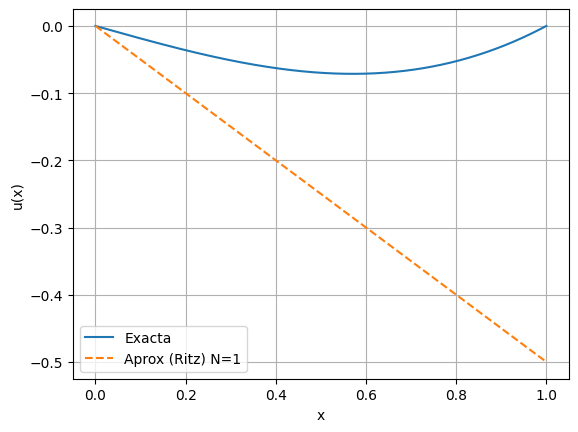


Resultados para N = 2
------------------------------
α1 = -0.98561
α2 = 0.43165

Solución aproximada u_N(x):
                   2                      
0.431654676258993⋅x  - 0.985611510791367⋅x
Error L2 (aprox) = 3.402015e-01


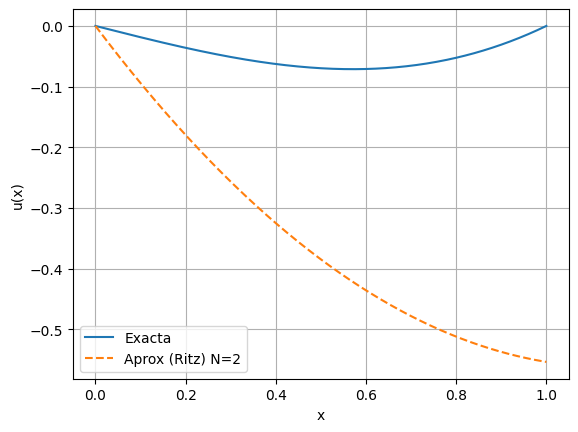


Resultados para N = 3
------------------------------
α1 = -0.85706
α2 = 0.03376
α3 = 0.26590

Solución aproximada u_N(x):
                   3                       2                      
0.265897580191334⋅x  + 0.0337647720877884⋅x  - 0.857062464828362⋅x
Error L2 (aprox) = 3.458841e-01


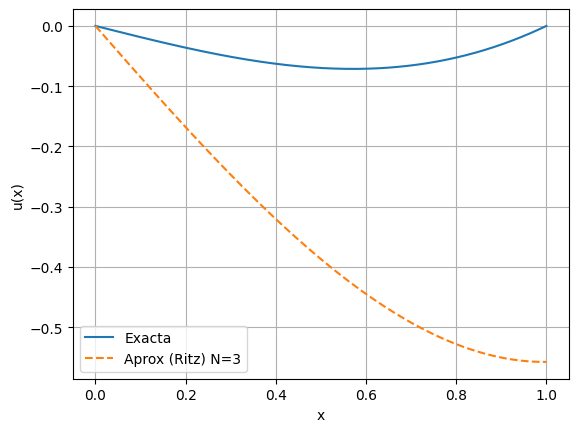

In [11]:
#para N
for N in [1, 2, 3]:
    print_solution(N)